In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | cobija
Processing Record 8 of Set 1 | miraflores
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | tirur
Processing Record 11 of Set 1 | saraza
Processing Record 12 of Set 1 | camapua
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | beloha
Processing Record 17 of Set 1 | songjianghe
Processing Record 18 of Set 1 | vorozhba
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | hambantota
Pro

Processing Record 40 of Set 4 | palmer
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | karamea
City not found. Skipping...
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | thanh hoa
Processing Record 45 of Set 4 | auki
Processing Record 46 of Set 4 | marienburg
Processing Record 47 of Set 4 | acari
Processing Record 48 of Set 4 | mayo
Processing Record 49 of Set 4 | van buren
Processing Record 50 of Set 4 | lima
Processing Record 1 of Set 5 | da lat
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | kiama
Processing Record 4 of Set 5 | alta floresta
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | maniitsoq
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | coihaique
Processing Record 10 of Set 5 | fortuna
Processing Record 11 of Set 5 | lompoc
Processing Record 12 of Set 5 | sheltozero
Processing Record 13

Processing Record 28 of Set 8 | synya
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | port-gentil
Processing Record 33 of Set 8 | ojinaga
Processing Record 34 of Set 8 | vire
Processing Record 35 of Set 8 | necochea
Processing Record 36 of Set 8 | shache
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | mitsamiouli
Processing Record 39 of Set 8 | kaniama
Processing Record 40 of Set 8 | ningyang
Processing Record 41 of Set 8 | dubbo
Processing Record 42 of Set 8 | suba
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | chernyshevskiy
Processing Record 45 of Set 8 | kirovskiy
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | monze
Processing Record 48 of Set 8 | harper
Processing Record 49 of Set 8 | pangnirtung
Processing Record 50 of Set 8 | hirara
Processing Record 1 o

Processing Record 20 of Set 12 | homer
Processing Record 21 of Set 12 | poya
Processing Record 22 of Set 12 | villa hayes
Processing Record 23 of Set 12 | whitehorse
Processing Record 24 of Set 12 | santo tomas
Processing Record 25 of Set 12 | yeniseysk
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | alpena
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | licheng
Processing Record 30 of Set 12 | clarence town
Processing Record 31 of Set 12 | solnechnyy
Processing Record 32 of Set 12 | kargasok
Processing Record 33 of Set 12 | rognan
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | nisia floresta
Processing Record 36 of Set 12 | oranjestad
Processing Record 37 of Set 12 | nemuro
Processing Record 38 of Set 12 | hopelchen
Processing Record 39 of Set 12 | belaya gora
Processing Record 40 of Set 12 | walvis bay
Processing Record 41 of Set 12 | sao francisco
Processing Record 42 of Set 12 | vikulovo
Processing R

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carutapera,-1.1950,-46.0200,79.86,78,40,9.35,BR,2021-09-05 21:16:52
1,Taoudenni,22.6783,-3.9836,102.04,9,2,7.70,ML,2021-09-05 21:16:53
2,Rikitea,-23.1203,-134.9692,74.25,76,88,13.31,PF,2021-09-05 21:16:53
3,Saint George,37.1041,-113.5841,101.79,15,1,1.01,US,2021-09-05 21:16:53
4,Cobija,-11.0267,-68.7692,83.21,59,91,3.09,BO,2021-09-05 21:16:54
5,Miraflores,19.2167,-98.8083,72.36,83,100,2.37,MX,2021-09-05 21:16:54
6,Qaanaaq,77.4840,-69.3632,19.08,79,54,5.82,GL,2021-09-05 21:16:55
7,Tirur,10.9000,75.9167,74.39,93,100,9.04,IN,2021-09-05 21:16:55
8,Saraza,8.7356,117.7800,78.62,84,76,2.62,PH,2021-09-05 21:16:55
9,Camapua,-19.5314,-54.0439,90.41,26,91,5.10,BR,2021-09-05 21:16:56


In [37]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [39]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carutapera,BR,2021-09-05 21:16:52,-1.1950,-46.0200,79.86,78,40,9.35
1,Taoudenni,ML,2021-09-05 21:16:53,22.6783,-3.9836,102.04,9,2,7.70
2,Rikitea,PF,2021-09-05 21:16:53,-23.1203,-134.9692,74.25,76,88,13.31
3,Saint George,US,2021-09-05 21:16:53,37.1041,-113.5841,101.79,15,1,1.01
4,Cobija,BO,2021-09-05 21:16:54,-11.0267,-68.7692,83.21,59,91,3.09
...,...,...,...,...,...,...,...,...,...
554,Baruun-Urt,MN,2021-09-05 21:20:47,46.6806,113.2792,41.25,82,26,4.34
555,Visnes,NO,2021-09-05 21:20:48,59.3556,5.2242,59.58,82,75,2.30
556,Biak,ID,2021-09-05 21:20:48,-0.9131,122.8766,74.66,89,100,5.70
557,Port Macquarie,AU,2021-09-05 21:20:48,-31.4333,152.9167,49.96,76,0,6.91


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

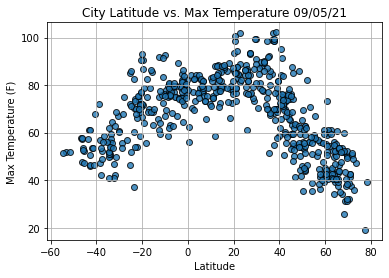

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

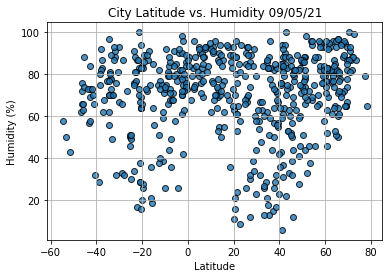

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

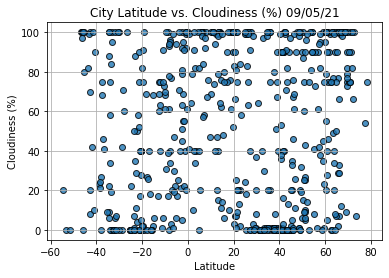

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

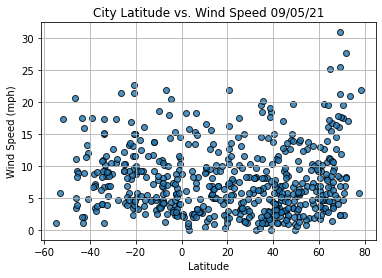

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Taoudenni,ML,2021-09-05 21:16:53,22.6783,-3.9836,102.04,9,2,7.70
3,Saint George,US,2021-09-05 21:16:53,37.1041,-113.5841,101.79,15,1,1.01
5,Miraflores,MX,2021-09-05 21:16:54,19.2167,-98.8083,72.36,83,100,2.37
6,Qaanaaq,GL,2021-09-05 21:16:55,77.4840,-69.3632,19.08,79,54,5.82
7,Tirur,IN,2021-09-05 21:16:55,10.9000,75.9167,74.39,93,100,9.04


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

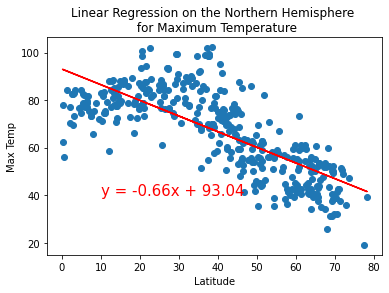

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

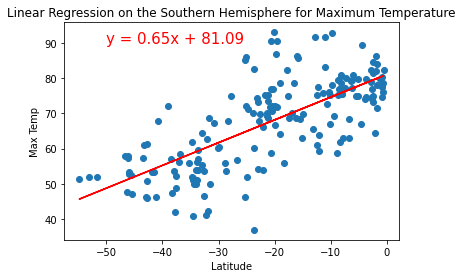

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

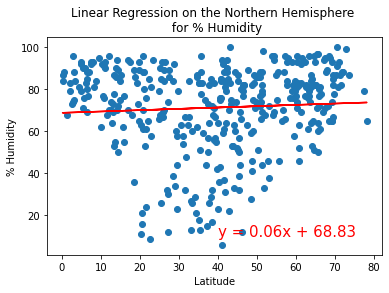

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

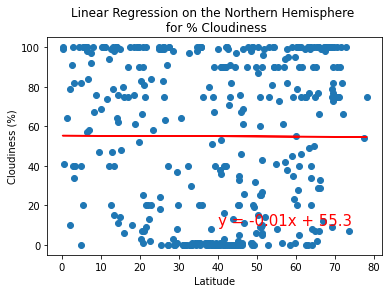

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness (%)',(40,10))

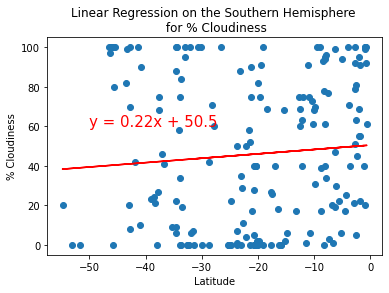

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
 

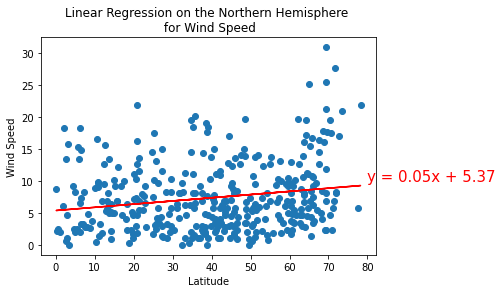

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(80,10))


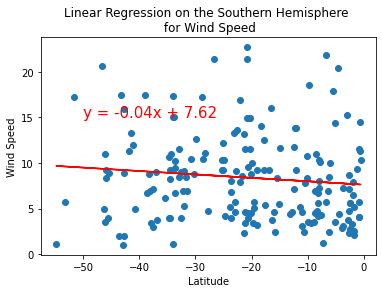

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))